# Temperature insensitivity test

In [12]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import re
from pandas import ExcelWriter
from datetime import datetime
import os
from functools import reduce 
import numpy as np
import xlrd
from os import devnull


os.chdir(r"C:\Users\Desi\Desktop\TesiStanford\data_to_analyze\121323-d1114-1-w-tempstab")

In [13]:
col_L = '#1E5986'
col_R = '#BF8F00'
col_diff = "#FF8080"

In [14]:
df_t = {}
temp = ['25','27','29','30','31','33','35','37','40']
for t in temp: df_t[t] = [pd.read_excel(xlrd.open_workbook(str(os.getcwd())+'\\'+excelfile, logfile=open(devnull, 'w')),engine='xlrd') for excelfile in os.listdir(str(os.getcwd())) if excelfile.endswith('.xls') and t in excelfile]

Text(0.5, 1.0, 'Temperature insensitivity test - Average of last 5 voltage values')

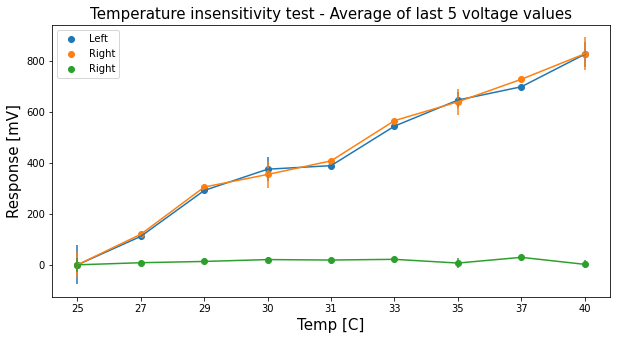

In [7]:
max_std_t = []
for i in temp:
    max_std_t.append([np.mean(np.mean([k[['DrainVLeft','DrainVRight']].iloc[-5:] for k in df_t[i]],1),0),np.std(np.mean([k[['DrainVLeft','DrainVRight']].iloc[-5:] for k in df_t[i]],1),0)])
    
fig, ax1 = plt.subplots(figsize=(10, 5))
plt.scatter(temp,[abs(i[0][0]-max_std_t[0][0][0])*1000 for i in max_std_t], label = 'Left')
plt.errorbar(temp,[abs(i[0][0]-max_std_t[0][0][0])*1000 for i in max_std_t], yerr = [i[1][0]*1000 for i in max_std_t] )
plt.scatter(temp,[abs(i[0][1]-max_std_t[0][0][1])*1000 for i in max_std_t], label = 'Right')
plt.errorbar(temp,[abs(i[0][1]-max_std_t[0][0][1])*1000 for i in max_std_t], yerr = [i[1][1]*1000 for i in max_std_t])
plt.scatter(temp,abs(np.array([i[0][1]-max_std_t[0][0][1] for i in max_std_t]) - np.array([i[0][0]-max_std_t[0][0][0] for i in max_std_t]))*1000, label = 'Right')
plt.errorbar(temp,abs(np.array([i[0][1]-max_std_t[0][0][1] for i in max_std_t]) - np.array([i[0][0]-max_std_t[0][0][0] for i in max_std_t]))*1000, yerr = [np.std(np.diff(np.mean([k[['DrainVLeft','DrainVRight']].iloc[-5:] for k in df_t[t]],1)))*1000 for t in temp])
plt.legend()
plt.xlabel('Temp [C]',fontsize = 15)
plt.ylabel('Response [mV]',fontsize = 15)
plt.title('Temperature insensitivity test - Average of last 5 voltage values',fontsize = 15)
#plt.savefig(r'C:\Users\Desi\Desktop\TesiStanford\images-results\TempInsensitivyTest-121323.jpeg')

Text(0.5, 1.0, 'Temperature insensitivity test - Average of last 5 voltage values - Diff values')

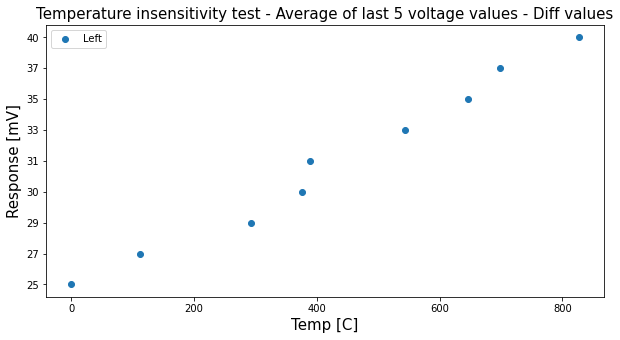

In [8]:
max_std_t = []
for i in temp:
    max_std_t.append([np.mean(np.mean([k[['DrainVLeft','DrainVRight']].iloc[-5:] for k in df_t[i]],1),0),np.std(np.mean([k[['DrainVLeft','DrainVRight']].iloc[-5:] for k in df_t[i]],1),0)])
    
fig, ax1 = plt.subplots(figsize=(10, 5))
plt.scatter([abs(i[0][0]-max_std_t[0][0][0])*1000 for i in max_std_t],temp, label = 'Left')
#plt.errorbar(temp,abs(np.array([i[0][1]-max_std_t[0][0][1] for i in max_std_t]) - np.array([i[0][0]-max_std_t[0][0][0] for i in max_std_t]))*1000, yerr = [np.std(np.diff(np.mean([k[['DrainVLeft','DrainVRight']].iloc[-5:] for k in df_t[t]],1)))*1000 for t in temp])
plt.legend()
plt.xlabel('Temp [C]',fontsize = 15)
plt.ylabel('Response [mV]',fontsize = 15)
plt.title('Temperature insensitivity test - Average of last 5 voltage values - Diff values',fontsize = 15)
#plt.savefig(r'C:\Users\Desi\Desktop\TesiStanford\images-results\TempInsensitivyTest_DiffValues-121323.jpeg')

In [ ]:
#Saving data in xlsx format
max_ = [maxim[0] for maxim in max_std_t]
std = [maxim[1] for maxim in max_std_t]
data = [[i[0] for i in max_], [i[0] for i in std], [i[1] for i in max_], [i[1] for i in std], index]
table = pd.DataFrame(data).transpose().rename(columns = {0: 'Mean_L [V]', 1: 'std_L [V]', 2: 'Mean_R [V]', 3: 'std_R [V]', 4: 'temperature'}).set_index('temperature')

table['|VL-VR|[V]'] = abs(table['Mean_L [V]']- table['Mean_R [V]'])
table['std |VL-VR|[V]'] = [np.std(np.diff(np.mean([k[['DrainVLeft','DrainVRight']].iloc[-5:] for k in df_t[t]],1))) for t in temp]
table['Diff [V]'] = abs(table['Mean_L [V]']-table['Mean_R [V]'])
table.to_excel(r'C:\Users\Desi\Desktop\TesiStanford\images-results\table_TempInsensitivityTest-121323-1.xlsx')

In [ ]:
table

,Mean_L [V],Mean_R [V],std_L [V],std_R [V],Diff [V]
25C,2.988341,2.860542,0.077005,0.048479,0.127799
27C,2.876553,2.740480,0.000000,0.000000,0.136074
29C,2.696431,2.555349,0.000000,0.000000,0.141081
30C,2.613026,2.505822,0.046906,0.051288,0.107204
31C,2.599178,2.452540,0.000000,0.000000,0.146638
33C,2.444079,2.294721,0.000000,0.000000,0.149357
35C,2.341741,2.220892,0.031697,0.049775,0.120849
37C,2.289638,2.132439,0.000000,0.000000,0.157199
40C,2.162114,2.032416,0.048372,0.064575,0.129698


In [10]:
# sorting the files in the folder based on the acquisition time

search_dir = r"C:\Users\Desi\Desktop\TesiStanford\data_to_analyze\121323-d1114-1-w-tempstab"

files = filter(os.path.isfile, os.listdir(search_dir))
files = [os.path.join(search_dir, f) for f in files] # add path to each file
files.sort(key=lambda x: os.path.getmtime(x))

In [16]:
df_t_order = []
df_t_order = [pd.read_excel(xlrd.open_workbook(excelfile, logfile=open(devnull, 'w')),engine='xlrd') for excelfile in files if excelfile.endswith('.xls')]

C:\Users\Desi\AppData\Local\Temp\ipykernel_13100\1997028131.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(range(len(order)), [(i[0] - max_t_ord[0][0]) * 1000 for i in max_t_ord], label = 'Left OFET', color = col_L,linewidth = 3, marker = 's', markersize = 10)
C:\Users\Desi\AppData\Local\Temp\ipykernel_13100\1997028131.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(range(len(order)),[(i[1]-max_t_ord[0][1])*1000 for i in max_t_ord], label = 'Right OFET', color = col_R,linewidth = 3, marker = 'o', markersize = 10)
C:\Users\Desi\AppData\Local\Temp\ipykernel_13100\1997028131.py:17: FutureWar

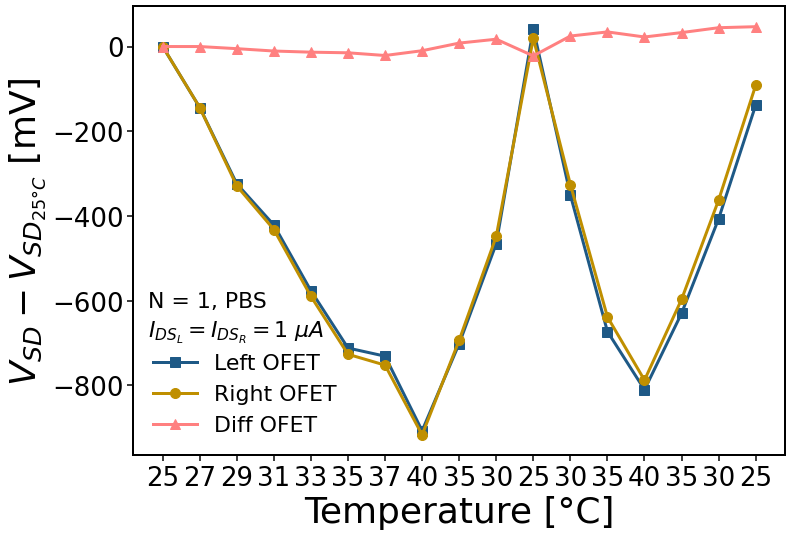

In [25]:
max_t_ord = []
order = ['25','27','29','31','33','35','37','40','35','30','25','30','35','40','35','30','25']

max_t_ord = [np.mean(k[['DrainVLeft','DrainVRight']].iloc[-5:],0) for k in df_t_order]

fig, ax1 = plt.subplots(figsize=(11.69, 8.26))

# width of the margins
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['top'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2)
ax1.spines['right'].set_linewidth(2)
plt.xticks(range(len(order)), order)

plt.plot(range(len(order)), [(i[0] - max_t_ord[0][0]) * 1000 for i in max_t_ord], label = 'Left OFET', color = col_L,linewidth = 3, marker = 's', markersize = 10)
plt.plot(range(len(order)),[(i[1]-max_t_ord[0][1])*1000 for i in max_t_ord], label = 'Right OFET', color = col_R,linewidth = 3, marker = 'o', markersize = 10)
plt.plot(range(len(order)),(np.array([i[1]-max_t_ord[0][1] for i in max_t_ord]) - np.array([i[0]-max_t_ord[0][0] for i in max_t_ord]))*1000, label = 'Diff OFET', color = col_diff,linewidth = 3, marker = '^', markersize = 10)

ax1.tick_params(axis='both', width=1.5,length=6,labelsize=26)
plt.legend(fontsize = 22, frameon=False)
plt.text(-0.4, -615, 'N = 1, PBS', fontsize = 22)
plt.text(-0.4, -685, '$I_{DS_L} = I_{DS_R} = 1\ \mu A$', fontsize = 22)
plt.xlabel('Temperature [°C]',fontsize = 36)
plt.ylabel('$V_{SD}-V_{SD_{25°C}}$ [mV]',fontsize = 36)
plt.savefig(r'C:\Users\Desi\Desktop\TesiStanford\ImagesThesis\timestab.jpeg',bbox_inches='tight', dpi = 1200)

In [ ]:
# saving data in clsx format

data = [[abs(i[0] - max_t_ord[0][0]) for i in max_t_ord],[abs(i[1] - max_t_ord[0][1]) for i in max_t_ord],abs(np.array([i[1]-max_t_ord[0][1] for i in max_t_ord]) - np.array([i[0]-max_t_ord[0][0] for i in max_t_ord])),order]
table = pd.DataFrame(data).transpose().rename(columns = {0: 'Mean_L [V]', 1: 'Mean_R [V]', 2: 'Diff |VR-VL| [V]', 3: 'temperature [C]'}).set_index('temperature [C]')
table.to_excel(r'C:\Users\Desi\Desktop\TesiStanford\images-results\table_TempInsensitivityTest-121323-2.xlsx')